In [1]:
#my modeling data is at the bottom of this notebook.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data_path = '/Users/xenokian/Desktop/ma_statewide_2020_04_01.csv'

In [4]:
df = pd.read_csv(data_path)

/var/folders/rz/k_h5bs1x2nnd1n_p465cxtmm0000gn/T/ipykernel_27193/606058143.py:1: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [5]:
#the dataset here contains information on traffic stops in the state of massachusetts (my home state) from december 2006 to december 2015. 
#the data includes the date of the stop, the location, age, race, sex, and information on whether or not a citation was issued.
#my null hypothesis is/was that being issued a citation correlates with race. 

In [6]:
df.head(5)

,raw_row_number,date,location,county_name,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,contraband_weapons,contraband_alcohol,contraband_other,frisk_performed,search_conducted,search_basis,reason_for_stop,vehicle_type,vehicle_registration_state,raw_Race
0,1,2007-06-06,MIDDLEBOROUGH,Plymouth County,33.0,white,male,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,Speed,Passenger,MA,White
1,2,2007-06-07,SEEKONK,Bristol County,36.0,white,male,vehicular,False,False,...,False,False,False,False,True,other,NaN,Commercial,MA,White
2,3,2007-06-07,MEDFORD,Middlesex County,56.0,white,female,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Passenger,MA,White
3,4,2007-06-07,MEDFORD,Middlesex County,37.0,white,male,vehicular,False,False,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,White
4,5,2007-06-07,EVERETT,Middlesex County,22.0,hispanic,female,vehicular,False,True,...,NaN,False,NaN,NaN,False,NaN,NaN,Commercial,MA,Hispanic


In [7]:
def preprocess_traffic_stops(df):
    df = df.copy() 
    categorical_cols = ['subject_race', 'subject_sex', 'vehicle_type', 'reason_for_stop']
    numerical_cols = ['subject_age']
    
    for col in categorical_cols:
        df[col] = df[col].fillna('Unknown')
    
    for col in numerical_cols:
        df[col] = df[col].fillna(df[col].median())

    df['citation_issued'] = df['citation_issued'].fillna(False)
    
   
    dummy_columns = ['subject_race', 'subject_sex', 'vehicle_type', 'reason_for_stop']
    df_dummies = pd.get_dummies(df[dummy_columns], prefix=dummy_columns)
    
    X = pd.concat([
        df_dummies,
        pd.DataFrame(df['subject_age'])
    ], axis=1)
    
    # converted citation_issued to int after handling nan values; was getting originally getting error
    y = df['citation_issued'].astype(bool).astype(int)
     
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    
    return {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'scaler': scaler,
        'feature_names': X.columns
    }

In [8]:
def generate_preprocessing_summary(data_dict):
    summary = {
        'train_size': len(data_dict['X_train']),
        'test_size': len(data_dict['X_test']),
        'feature_count': len(data_dict['feature_names']),
        'class_distribution_train': pd.Series(data_dict['y_train']).value_counts(normalize=True),
        'class_distribution_test': pd.Series(data_dict['y_test']).value_counts(normalize=True)
    }
    return summary

In [9]:
processed_data = preprocess_traffic_stops(df)

In [10]:
summary = generate_preprocessing_summary(processed_data)

In [11]:
print("Preprocessing Summary:")
for key, value in summary.items():
    print(f"\n{key}:")
    print(value)

Preprocessing Summary:

train_size:
2732990

test_size:
683248

feature_count:
27

class_distribution_train:
citation_issued
1    0.635577
0    0.364423
Name: proportion, dtype: float64

class_distribution_test:
citation_issued
1    0.635577
0    0.364423
Name: proportion, dtype: float64


In [12]:
#summary:
#as we can see, the class distribution is identical between training and test sets, indicating a successful split.
#citations were being issued in roughly 2/3 of stops. a moderate class imbalance, but the class proportions across splits
#suggests that this data is ready for modeling. i followed all steps of the rubric, as i created dummy features, performed scale
#standardization, and split the data into training and test splits. 

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import re

Step 1: Training and Evaluating Models

Training and evaluating Logistic Regression...

Logistic Regression Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.63      0.56    248991
           1       0.75      0.65      0.70    434257

    accuracy                           0.64    683248
   macro avg       0.63      0.64      0.63    683248
weighted avg       0.66      0.64      0.65    683248


ROC AUC Score: 0.669


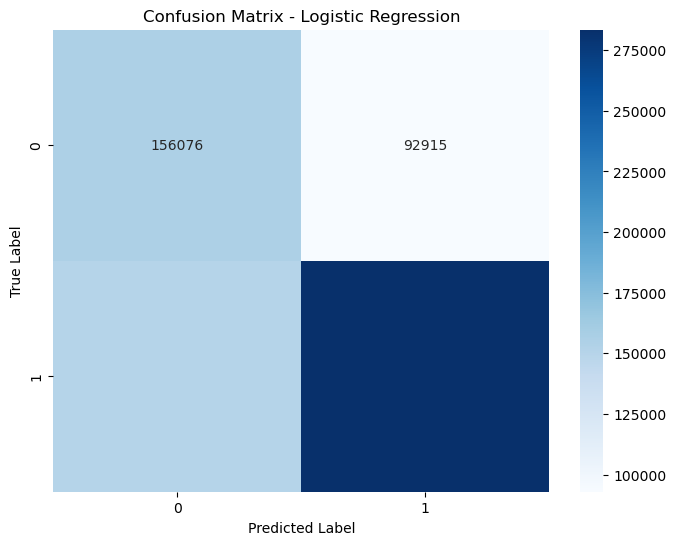

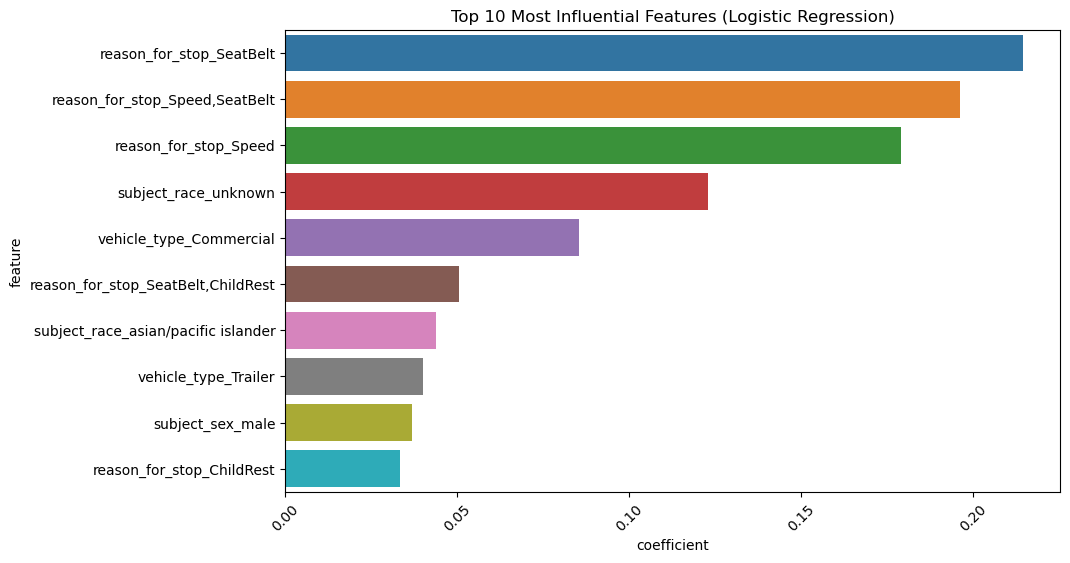


Training and evaluating Random Forest...

Random Forest Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.63      0.57    248991
           1       0.76      0.65      0.70    434257

    accuracy                           0.65    683248
   macro avg       0.63      0.64      0.63    683248
weighted avg       0.67      0.65      0.65    683248


ROC AUC Score: 0.680


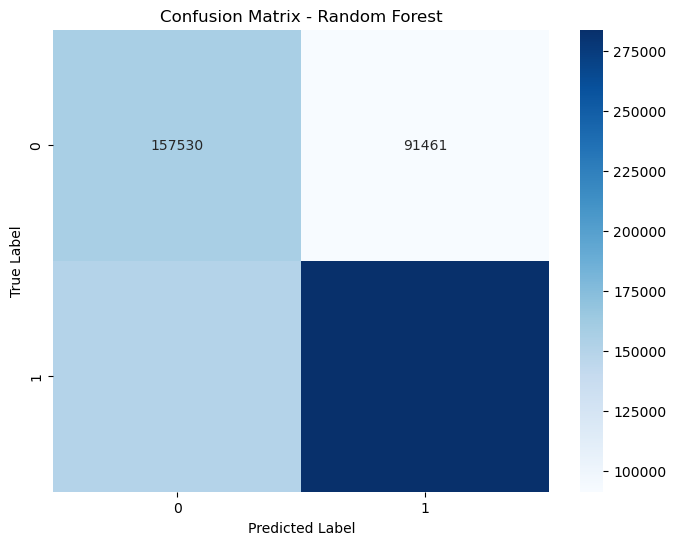

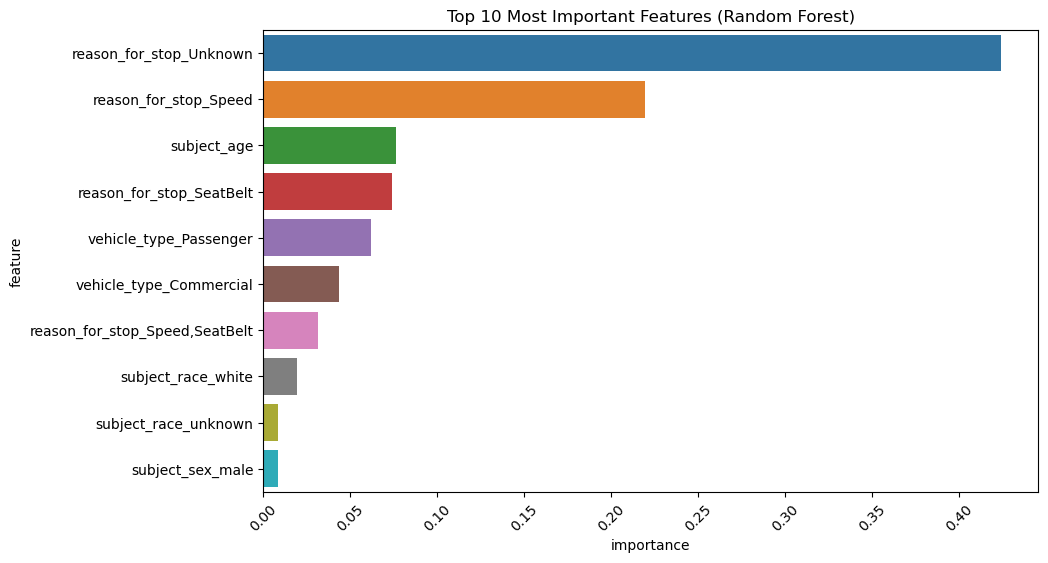

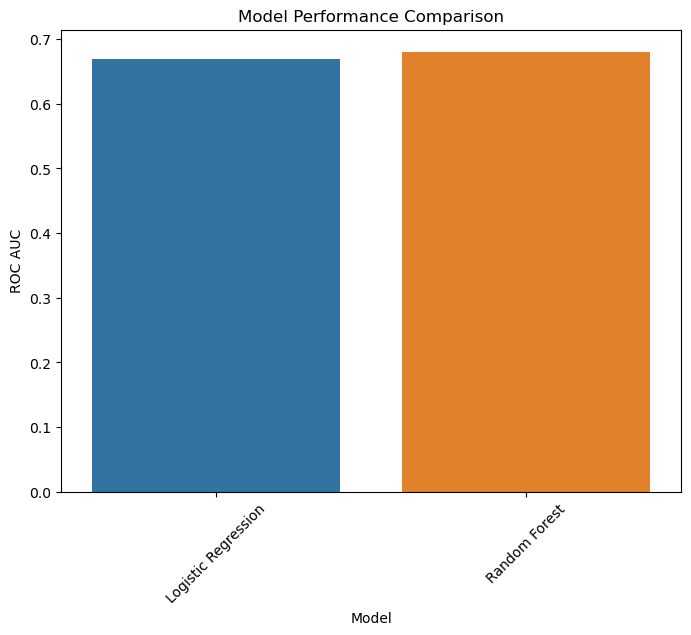


Step 2: Interpreting Results

Model Performance Analysis:

Logistic Regression:
ROC AUC Score: 0.669
Precision (Class 1): 0.753
Recall (Class 1): 0.653

Random Forest:
ROC AUC Score: 0.680
Precision (Class 1): 0.756
Recall (Class 1): 0.654

Best Performing Model: Random Forest
ROC AUC Score: 0.680


In [20]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """
    
    Models chosen:
    1. Logistic Regression: baseline model, highly interpretable, good for understanding feature importance, which is the goal of this case 
    study
    2. Random Forest: handles non-linear relationships, good for complex interactions
    """
    
    models = {
        'Logistic Regression': LogisticRegression(
            class_weight='balanced',  
            max_iter=1000,           
            random_state=42          
        ),
        'Random Forest': RandomForestClassifier(
            n_estimators=100,        
            class_weight='balanced', 
            max_depth=10,           
            random_state=42         
        )
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\nTraining and evaluating {name}...")
        
        
        model.fit(X_train, y_train)
        
        
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        
        results[name] = {
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_prob)
        }
        
        
        print(f"\n{name} Results:")
        print("\nClassification Report:")
        print(results[name]['classification_report'])
        print(f"\nROC AUC Score: {results[name]['roc_auc']:.3f}")
        
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            results[name]['confusion_matrix'],
            annot=True,
            fmt='d',
            cmap='Blues'
        )
        plt.title(f'Confusion Matrix - {name}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
        #feature importance
        if name == 'Random Forest':
            feature_importance = pd.DataFrame({
                'feature': X_train.columns,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            plt.figure(figsize=(10, 6))
            sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
            plt.title('Top 10 Most Important Features (Random Forest)')
            plt.xticks(rotation=45)
            plt.show()
        elif name == 'Logistic Regression':
            coef_df = pd.DataFrame({
                'feature': X_train.columns,
                'coefficient': model.coef_[0]
            }).sort_values('coefficient', ascending=False)
            
            plt.figure(figsize=(10, 6))
            sns.barplot(data=coef_df.head(10), x='coefficient', y='feature')
            plt.title('Top 10 Most Influential Features (Logistic Regression)')
            plt.xticks(rotation=45)
            plt.show()
    
    #compare models
    model_comparison = pd.DataFrame({
        'Model': list(results.keys()),
        'ROC AUC': [results[model]['roc_auc'] for model in results.keys()]
    })
    
    plt.figure(figsize=(8, 6))
    sns.barplot(data=model_comparison, x='Model', y='ROC AUC')
    plt.title('Model Performance Comparison')
    plt.xticks(rotation=45)
    plt.show()
    
    return results, models

def interpret_results(results, models, X_test, y_test):
    print("\nModel Performance Analysis:")
    print("===========================")
    
    for name, result in results.items():
        print(f"\n{name}:")
        print(f"ROC AUC Score: {result['roc_auc']:.3f}")
        
        y_pred = models[name].predict(X_test)
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        print(f"Precision (Class 1): {report_dict['1']['precision']:.3f}")
        print(f"Recall (Class 1): {report_dict['1']['recall']:.3f}")
    
    best_model = max(results.items(), key=lambda x: x[1]['roc_auc'])
    print(f"\nBest Performing Model: {best_model[0]}")
    print(f"ROC AUC Score: {best_model[1]['roc_auc']:.3f}")

print("Step 1: Training and Evaluating Models")
print("=====================================")
results, models = train_and_evaluate_models(
    processed_data['X_train'],
    processed_data['X_test'],
    processed_data['y_train'],
    processed_data['y_test']
)

print("\nStep 2: Interpreting Results")
print("===========================")
interpret_results(
    results,
    models,
    processed_data['X_test'],
    processed_data['y_test']
)

In [ ]:
#as we can see, the best performing model was the random forest. i tried to implement SVM but it was taking way too long to run, and after 
#these results it did not seem to necessary to include a third model. i used logistic regression and random forest as i feel the best tackle
#my null hypothesis, which is that race is correlated to a traffic stop, and based on the results, we are proven otherwise.